In [ ]:
!python -m pip install spiceypy
!python -m pip install rebound
import spiceypy as spy
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
deg=np.pi/180
rad=1/deg

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/*.png",bbox_inches='tight')

Mounted at /content/drive


In [ ]:
### Vector alfa centauri desde la tierra
lat = -0.68121 #°
lon = 315.7377 #°
r = 4.1154e13 #km
U = spy.latrec(r,lon*deg,lat*deg)

### Parametros sol y centro galactico
ly=9460730472580.8 #km
nombres=["delta-v 1","Arco de coasting 1","delta-v 2","Arco de coasting 2"]
msun=1.989e30 #kg
mgal=1.15e12 #msun
msunkg=msun*mgal # masa centro galactico en kg
sim=rb.Simulation()
sim.units=["kg","km","s"]
sim.G
Vsun=255 # Velocidad del sol alrededor del centro galactico
rsun=sim.G*msunkg/Vsun**2 # Distancia sol al centro galactico

### Determinación vector posición alfa centauri
alfa=np.arccos(U[0]/r) # Angulo desde el sol entre el centro galactico y alfa centauri
alfa*rad
#Dcg_ac=(*2+rsun**2-2*r*rsun*np.cos(alfa))**0.5 #distancia centro galactico - alfa centauri
vsun=[-rsun,0,0]
vac=vsun+U 

### Dirección vectorial de la velocidad de alfa centauri
phi=np.arctan(vac[2]/vac[0])
phi
n2=[np.sin(phi),0,np.cos(phi)]
vx1=-1.223341698e-5
vy1=0.999999999
vz1=(1-(-1.223341698e-5)**2-0.999999999**2)**0.5
rac=[vx1,vy1,vz1]
vvac=vac+rac

In [ ]:
#Componentes vector Alfa centauri - centro de la galaxia
cdx=(-2.3476763177937126e+18)/(2.347676317969385e+18)
cdy=(-2.87211662e+13)/(2.347676317969385e+18)
cdz=(-4.89283087e+11)/(2.347676317969385e+18)
VTangente=spy.unorm(spy.vcrss([-0.9999999999,-1.223387e-05,-2.0841165e-07],[-2.08412e-07,1.223387e-05,0.999]))[0]
Vtangente=spy.vcrss([-0.9999999999,-1.223387e-05,-2.0841165e-07],[-2.08412e-07,1.223387e-05,0.999])
VTangente,Vtangente

(array([-1.22338674e-05,  1.00000000e+00, -1.22461187e-05]),
 array([-1.22216336e-05,  9.99000000e-01, -1.22338725e-05]))

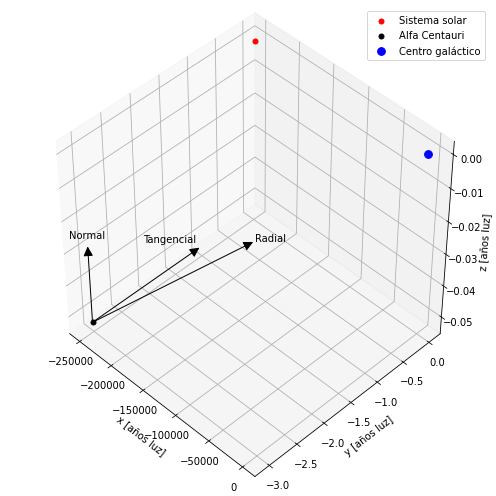

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure(figsize = (7,7))
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

       def __init__(self, xs, ys, zs, *args, **kwargs):
           FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
           self._verts3d = xs, ys, zs

       def draw(self, renderer):
           xs3d, ys3d, zs3d = self._verts3d
           xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
           self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
           FancyArrowPatch.draw(self, renderer)

ax.scatter(vsun[0]/ly, vsun[1]/ly,vsun[2]/ly,label="Sistema solar",s=25,c="r")
ax.scatter(vac[0]/ly, vac[1]/ly,vac[2]/ly,label="Alfa Centauri",s=25,c="k")
ax.scatter(0,0,0,label="Centro galáctico",s=60,c="blue")

a = Arrow3D([0, vac[0]/ly], [0, vac[1]/ly], [0, vac[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")

b = Arrow3D([0, vsun[0]/ly], [0, vsun[1]/ly], [0, vsun[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="r")
c = Arrow3D([vsun[0]/ly, vac[0]/ly], [vsun[1]/ly, vac[1]/ly], [vsun[2]/ly, vac[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="orange")
d = Arrow3D([vac[0],vvac[0]], [vac[1],vvac[1]], [vac[2],vvac[2]], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
e = Arrow3D([0,rac[0]], [0,rac[1]], [0,VTangente[2]], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
f = Arrow3D([vac[0]/ly,vac[0]/ly+VTangente[0]*2], [vac[1]/ly,vac[1]/ly+VTangente[1]*2], [vac[2]/ly,vac[2]/ly+VTangente[2]*2], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
g = Arrow3D([vac[0]/ly,vac[0]/ly+spy.vcrss(-vac,VTangente)[0]/ly/1e7], [vac[1]/ly,vac[1]/ly+spy.vcrss(-vac,VTangente)[1]/ly/1e7], [vac[2]/ly,vac[2]/ly+spy.vcrss(-vac,VTangente)[2]/ly/1e7], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
h = Arrow3D([vac[0]/ly,vac[0]/ly-vac[0]/ly/2], [vac[1]/ly,vac[1]/ly-vac[1]/ly/2], [vac[2]/ly,vac[2]/ly-vac[2]/ly/2], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")

ax.text(vac[0]/ly+VTangente[0]*2-5e4,vac[1]/ly+VTangente[1]*2-0.5,vac[2]/ly+VTangente[2]*2,"Tangencial")
ax.text(vac[0]/ly+spy.vcrss(-vac,VTangente)[0]/ly/1e7-1e4,vac[1]/ly+spy.vcrss(-vac,VTangente)[1]/ly/1e7-0.2,vac[2]/ly+spy.vcrss(-vac,VTangente)[2]/ly/1e7+0.003,"Normal")
ax.text(vac[0]/ly-vac[0]/ly/2,vac[1]/ly-vac[1]/ly/2,vac[2]/ly-vac[2]/ly/2,"Radial")
#[-0.9999999999,-1.223387e-05,-2.0841165e-07]
#[-2.08412e-07,1.223387e-05,0.999]
#ax.set_xlim(-1e-2,1e-2)
#ax.set_ylim(-9,9)
#ax.set_zlim(-1e-1,1e-1)
#ax.add_artist(a)
#ax.add_artist(b)
#ax.add_artist(c)
#ax.add_artist(d)
#ax.add_artist(e)
ax.add_artist(f)
ax.add_artist(g)
ax.add_artist(h)
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
plt.legend()
ax.view_init(45,-45)
fig.tight_layout()
#ax.quiver(0,0,0,1e18,0,0,length=2.0)
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/flechas2.png")#,bbox_inches='tight')
plt.show()

In [ ]:
spy.vcrss(-vac,VTangente)/ly/1e7

array([-5.17544402e-09,  3.03886860e-07,  2.48149583e-02])

In [ ]:
rac#ya no messirve (._. )( ._.)

[-1.223341698e-05, 0.999999999, 4.3015618489438234e-05]

In [ ]:
mss=1.989e30
mac=2.167e30
sim=rb.Simulation()
sim.integrator="ias15"
#sim.dt=1e-5
sim.units=["kg","km","s"]
Vac=(sim.G*msunkg/spy.vnorm(vac))**0.5-1
#vac[0]*x+vac[1]*y+vac[2]*z=0
sim.add(m=msunkg)

sim.add(m=mss,x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)
sim.add(m=mac,x=vac[0],y=vac[1],z=vac[2],vx=Vac*VTangente[0],vy=Vac*VTangente[1],vz=Vac*VTangente[2])
m=10
'''
for i in range(m-1):
    ma=(msunkg-sim.particles[0].m)/m    
    sim.add(m=ma,x=-(i+1)*rsun/m,vy=(sim.G*sim.particles[0].m/((i+1)*rsun/m))**0.5)
    '''
sim.save("initial.bin")


In [ ]:
from tqdm import tqdm
sim=rb.Simulation("initial.bin")
p1=sim.particles[1]
#p2=sim.particles[2]
Nt=1000
años=2500000000
rs1=np.zeros((Nt,9))
rs2=np.zeros((Nt,9))
ts=np.linspace(0,365.25*años*86400,Nt)
for i,t in enumerate(tqdm(ts)):
    sim.integrate(t)
    p1=sim.particles[1]
    p2=sim.particles[2]
    rs1[i,:]=p1.x,p1.y,p1.z,p1.a,p1.e,p1.vx,p1.vy,p1.vz,p1.inc
    rs2[i,:]=p2.x,p2.y,p2.z,p2.a,p2.e,p2.vx,p2.vy,p2.vz,p2.inc


100%|██████████| 1000/1000 [00:00<00:00, 10698.55it/s]


In [ ]:
rs1[-1,5:],rs2[-1,5:]

(array([ 2.04081618e-02,  8.58507212e-05,  2.55000000e+02, -3.20360624e-09]),
 array([ 1.03968771e-02, -3.01883168e-03,  2.53747599e+02, -3.10742025e-03]))

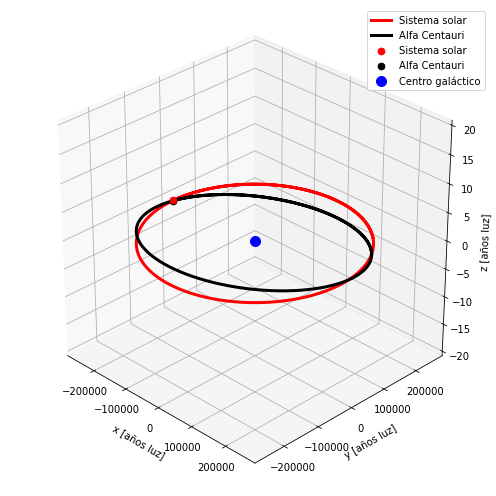

In [ ]:
fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(111,projection='3d')
yuj=1000

#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes/orbitapolar1.png",bbox_inches='tight')

ax1.plot(rs1[:yuj,0]/ly, rs1[:yuj,1]/ly,rs1[:yuj,2]/ly,linewidth=3,c="r",label="Sistema solar")
ax1.plot(rs2[:yuj,0]/ly, rs2[:yuj,1]/ly,rs2[:yuj,2]/ly,linewidth=3,c="k",label="Alfa Centauri")
ax1.scatter(rs1[0,0]/ly, rs1[0,1]/ly,rs1[0,2]/ly,label="Sistema solar",s=45,c="r")
ax1.scatter(rs2[0,0]/ly, rs2[0,1]/ly,rs2[0,2]/ly,label="Alfa Centauri",s=45,c="k")

ax1.scatter(0, 0,0,label="Centro galáctico",s=100,c="blue")
#ax1.scatter(rs1[0,0]/ly, rs1[0,1]/ly,rs1[0,2]/ly,s=100,c="k")#,label="Sol")
#ax1.scatter(rs2[0,0], rs2[0,1],rs2[0,2])#,s=10)#,label="Alfa Centauri")
a = Arrow3D([0, vac[0]/ly], [0, vac[1]/ly], [0, vac[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")

b = Arrow3D([0, vsun[0]/ly], [0, vsun[1]/ly], [0, vsun[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
c = Arrow3D([vsun[0]/ly, vac[0]/ly], [vsun[1]/ly, vac[1]/ly], [vsun[2]/ly, vac[2]/ly], mutation_scale=20,
               lw=1, arrowstyle="-|>", color="k")
ax1.set_xlabel("x [años luz]")
ax1.set_ylabel("y [años luz]")
ax1.set_zlabel("z [años luz]")
#ax1.add_artist(a)
#ax1.add_artist(b)
#ax1.add_artist(c)
plt.legend()
ax1.set_zlim(-20,20)
ax1.view_init(30,-45)
fig.tight_layout()
#ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/trayectorias100.png",bbox_inches='tight')
#plt.show()


In [ ]:
!python -m pip install poliastro
from poliastro.iod.izzo import lambert
import astropy.units as u

vec1=rs1[-1,:3]
vec2=rs2[-1,:3]
compa=spy.vnorm(vec1-vec2)

time=365.25*75000*86400
mu=sim.G*msunkg
(v1,v2),=lambert(mu*u.km**3/u.s**2,np.array(vsun)*u.km,vec2*u.km,time*u.s)
r-compa,np.array(vsun),vec2,v1

In [ ]:
type(np.array(v1))

numpy.ndarray

In [ ]:
X=np.concatenate((np.array(vsun),np.array(v1)))
E=spy.oscltx(X,0,mu)
print(f"q = {E[0]}")
print(f"e = {E[1]}")
print(f"I = {E[2]*rad}")
print(f"W = {E[3]*rad}")
print(f"w = {E[4]*rad}")
E

q = 2176.213496935286
e = 1.0000000513836187
I = 0.018537882654735233
W = 180.0
w = 179.98080748242063


array([ 2.17621350e+03,  1.00000005e+00,  3.23547089e-04,  3.14159265e+00,
        3.14125768e+00, -1.89337929e+01,  0.00000000e+00,  1.52659569e+23,
        3.14192763e+00, -3.87893822e+10,  0.00000000e+00])

# Optimización

In [ ]:
#Unidades canónicas
REarth=6378 #km
Mearth=5.98e24 #kg
G=6.67e-20 #km^3/(kg*s^2)
UL=REarth
UM=Mearth
UT=np.sqrt(UL**3/(UM*G))
UV=UL/UT
mu=1



class Engine(object):
    def calcula_aceleraciones(self,ucontrol):
        uvec,unorm=spy.unorm(ucontrol)
        #Paso 1
        teta=np.arctan2(uvec[1],uvec[0])
        #Paso 2
        R=spy.rotate(teta,3)
        #Paso 3
        deltavp=[self.deltav*np.cos(self.ieng),
                 self.deltav*np.sin(self.ieng),
                 0
                ]
        #Paso 4
        deltav=spy.mxv(spy.invert(R),deltavp)
        self.avec=deltav/self.deltat
        
class Engine3d(object):
    def calcula_aceleraciones(self,ucontrol):
        uvec,unorm=spy.unorm(ucontrol)
        #Paso 1
        phi=np.arctan2(uvec[1],uvec[0])
        teta=np.arccos(uvec[2]/unorm)
        #Paso 2
        R=spy.eul2m(0,teta,phi,3,2,3)
        #Paso 3
        deltavp=[self.deltav*np.sin(self.ieng)*np.cos(self.reng),
                 self.deltav*np.sin(self.ieng)*np.sin(self.reng),
                 self.deltav*np.cos(self.ieng)
                ]
        #Paso 4
        deltav=spy.mxv(spy.invert(R),deltavp)
        self.avec=deltav/self.deltat

def maniobras(unidades,inicial,arcos):
    global engine
    
    sim=rb.Simulation()
    sim.units=unidades
    sim.add(m=msunkg)
    sim.add(m=0,**inicial)
    #sim.add(m=mss,x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)
    #sim.add(m=mac,x=vac[0],y=vac[1],z=vac[2],vx=Vac*VTangente[0],vy=Vac*VTangente[1],vz=Vac*VTangente[2])
    sim.dt=sim.particles[1].P/100

    def force_impulse(simulation):
        global engine
        sim=simulation.contents
        p=sim.particles[1]
        if engine.turnon:
            p.ax+=engine.avec[0]
            p.ay+=engine.avec[1]
            p.az+=engine.avec[2]

    sim.additional_forces=force_impulse
    sim.force_is_velocity_dependent=True

    engine=Engine3d()
    Xas=[]
    Eas=[]
    tus=[]
    tu=0
    for arco in arcos:    
        p=sim.particles[1]
        P=abs(p.P)
        engine.deltav=arco["deltav"]
        engine.deltat=arco["deltat"]
        engine.turnon=1 if abs(arco["deltav"])>0 else 0
        engine.deltat*=1 if arco["unit"]=="ut" else P
        engine.ieng=arco["ieng"]
        engine.reng=arco["reng"]
        engine.calcula_aceleraciones([p.vx,p.vy,p.vz])
        
        ts=np.linspace(tu,tu+engine.deltat,arco["N"])
        Xs=[]
        Es=[]
        for t in ts:
            sim.integrate(t)
            p=sim.particles[1]
            o=sim.calculate_orbits()[0]
            Xs+=[[p.x,p.y,p.z,p.vx,p.vy,p.vz]]
            Es+=[[o.a,o.e,o.inc,o.Omega,o.omega,o.M,o.n,o.f]]
        Xs=np.array(Xs)
        Es=np.array(Es)
        Xas+=[Xs]
        Eas+=[Es]
        tus+=[ts]
        tu=t
    
    return tus,Xas,Eas

## 75000 años

In [ ]:
Xas=[]
rt=rs2[-1,:3]
def cambio_plano(V,Nc=100):
    global Xas,rt,años
    #Variables de control
    dv1=V[0]
    tT1=años*86400*365.25
    tieng=V[1]
    treng=V[2]    
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1]-5913.52e6,z=vsun[2],vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]
    #Target
    at=4*REarth
    et=0
    It=30*deg
    
    #Función de costo
    f=(spy.vnorm(rf-rt))**2/REarth**2
    #f=rf-rt
    print(V,rf,rt,f)
    
    return f

In [ ]:
Dv1=np.array([0,Vsun,0])-np.array(v1)
v1esf=spy.reclat(Dv1)
v1esf,(v1esf[1])*rad,[v1esf[0]/10000000,90,0]

((1983835.2116623672, 3.1414641146853546, -1.7475525999814561e-15),
 179.99263526327243,
 [0.19838352116623673, 90, 0])

[0.19838352116623673, 90, 0] [-2.34770571e+18  6.03533180e+14 -4.69538080e+11] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 4.601022435906779e+19


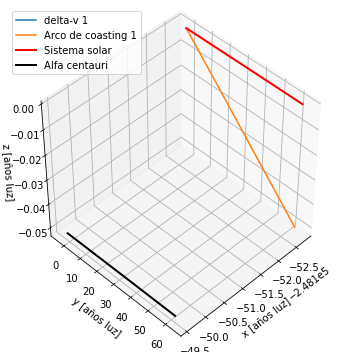

In [ ]:
Xas=[]
V0=[v1esf[0]/10000000,90,0]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/75000 años inicial.png")#,bbox_inches='tight')

In [ ]:
V0=[v1esf[0]/10000000,90,0]
V0=[ 20.89739345, 104.00812447, -42.95304995]
#V0=[ 19.46611599,138.44229573, -89.03510366]
sol=minimize(cambio_plano,V0,args=(3,))
sol#5913.52e6

[ 20.89739345 104.00812447 -42.95304995] [-2.34767301e+18  5.91560829e+14 -3.51240960e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.928091103453923e+19
[ 20.89739345 104.00812447 -42.95304995] [-2.34767301e+18  5.91560829e+14 -3.51240960e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.928091103453923e+19
[ 20.89739346 104.00812447 -42.95304995] [-2.34767301e+18  5.91560829e+14 -3.51240960e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.928091107257429e+19
[ 20.89739345 104.00812448 -42.95304995] [-2.34767301e+18  5.91560829e+14 -3.51240960e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.928091101815918e+19
[ 20.89739345 104.00812447 -42.95304994] [-2.34767301e+18  5.91560829e+14 -3.51240960e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.9280911047551115e+19
[ 20.0124151  104.38924625 -43.25580316] [-2.34767427e+18  5.91762399e+14 -3.34144108e+13] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 3.6476819220606943e+19
[ 20.0124151  104.38

      fun: 8.12888465280498
 hess_inv: array([[ 3.65878383e-18, -2.70061642e-20, -2.82430897e-20],
       [-2.95338652e-20,  3.55499788e-17,  2.18727828e-19],
       [-2.69048757e-20,  2.17096203e-19,  7.70433343e-17]])
      jac: array([64041487.09638417,  7848929.12872744, 15852948.85381508])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 387
      nit: 16
     njev: 75
   status: 2
  success: False
        x: array([ 18.27994929, 137.07196369, -89.03429849])

[18.27994929, 137.07196369, -89.03429849] [-2.34767625e+18  5.71853871e+14 -4.96635283e+11] [-2.34767625e+18  5.71853871e+14 -4.96635286e+11] 9.926468824258745


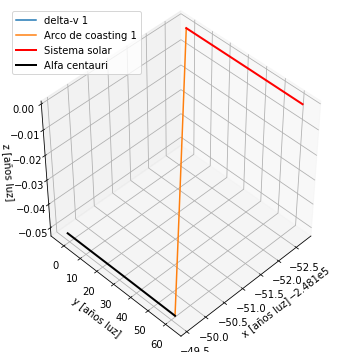

In [ ]:
Xas=[]
cambio_plano([ 18.27994929, 137.07196369, -89.03429849]) #8.12888465280498
#cambio_plano([ 18.2817788 , 137.07729683, -89.03429849])
#cambio_plano([ 19.46611599,138.44229573, -89.03510366])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/75000 años.png")#,bbox_inches='tight')

## 100 años

In [ ]:
Xas=[]
rt=rs2[-1,:3]
años=100
def cambio_plano(V,Nc=100):
    global Xas,rt,años
    #Variables de control
    dv1=V[0]
    tT1=años*86400*365.25
    tieng=V[1]
    treng=V[2]    
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)#+5913.52e6

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]
    #Target
    at=4*REarth
    et=0
    It=30*deg
    
    #Función de costo
    f=(spy.vnorm(rf-rt))**2/REarth**2
    #f=rf-rt
    print(V,rf,rt,f)
    
    return f

In [ ]:
[v1esf[0]/500,90,180]

[3967.6704233247347, 90, 180]

[3967.6704233247347, 90, 180] [-2.34770579e+18  8.04718800e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.5795428208190005e+19


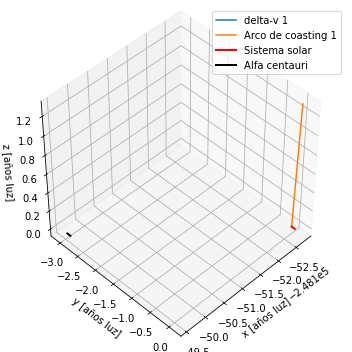

In [ ]:
Xas=[]
V0=[v1esf[0]/500,90,180]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/100 años inicial.png")#,bbox_inches='tight')

In [ ]:
#V0=[13041.78754681,   134.26230354,   270.95118532]
#V0=[13041.81798468,   134.26220812,   270.96266918]
#V0=[13041.81800546,   134.26230402,   270.95118529]
[v1esf[0]/500,90,180]
sol=minimize(cambio_plano,V0,args=(3,))
sol

[3967.67042332   90.          180.        ] [-2.34770579e+18  8.04718800e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.5795428208190005e+19
[3967.67042332   90.          180.        ] [-2.34770579e+18  8.04718800e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.5795428208190005e+19
[3967.67042334   90.          180.        ] [-2.34770579e+18  8.04718800e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.5795428208220094e+19
[3967.67042332   90.00000001  180.        ] [-2.34770579e+18  8.04718797e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.579542820359104e+19
[3967.67042332   90.          180.00000001] [-2.34770579e+18  8.04718800e+11  1.25210156e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.579542820299703e+19
[3967.66604229   90.66961627  180.75610506] [-2.34770562e+18  6.58389075e+11  1.25190565e+13] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 4.5349324301830865e+19


      fun: 1.1929298697213662
 hess_inv: array([[ 3.35409301e-12,  5.89900034e-15,  6.46997271e-16],
       [ 5.89900034e-15,  5.32254876e-17, -7.65293541e-18],
       [ 6.46997271e-16, -7.65293541e-18,  5.42952862e-17]])
      jac: array([   47784.88762808, 25106651.77068654, 14782057.25127566])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 33
     njev: 136
   status: 2
  success: False
        x: array([13041.78754481,  -134.26230354,   450.95118532])

[13041.81798468, 134.26220812, 270.96266918] [-2.34767632e+18 -2.79204176e+13 -4.95201634e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 858279735636.7433


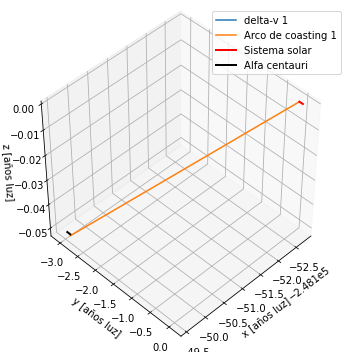

In [ ]:
Xas=[]
cambio_plano([13041.81798468,   134.26220812,   270.96266918])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/100 años con sistemas.png")#,bbox_inches='tight')


Error con los sistemas: [13041.81798468,   134.26220812,   270.96266918] 9757856.092798566

## 100 años quedando en orbita

In [ ]:
Xas=[]
años=100
rt=rs2[-1,:3]
def cambio_plano(V,Nc=100):
    global Xas,rt,años
    #Variables de control
    # valores de la anterior: [13041.78754681,   134.26230354,   270.95118532]
    Vini=[13041.78754681,   134.26230354,   270.95118532]
    dv1=Vini[0]
    tT1=años*86400*365.25
    tieng=Vini[1]
    treng=Vini[2]
    dv2=V[0]
    tT2=100*86400*365.25
    tieng2=V[1]
    treng2=V[2]   

    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2]+5913.52e6,vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    dict(deltav=dv2,ieng=tieng2*deg,reng=treng2*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT2,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]
    #Target
    at=rs2[-1,3]
    et=rs2[-1,4]
    It=rs2[-1,8]
    
    #Función de costo
    #f=(spy.vnorm(rf-rt))**2/REarth**2
    f=(ef-et)**2 + (af-at)**2/REarth**2+(If-It)**2/np.pi**2
    print(V,rf,rt,f)
    
    return f

In [ ]:
v2rec=spy.reclat(rs2[-1,5:8]-np.array(v2))
v2,rs2[-1,5:8],v2rec

(<Quantity [-1.98383514e+06,  4.83228381e+02, -4.19667117e-01] km / s>,
 array([-3.01708352e-03,  2.53747599e+02, -3.10742025e-03]),
 (1983835.1466765236, -0.00011567532862220411, 2.0997697176957118e-07))

[1500, 90, 270] [-2.34765010e+18 -5.92771368e+13 -9.72684053e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.3297418455582856e+29


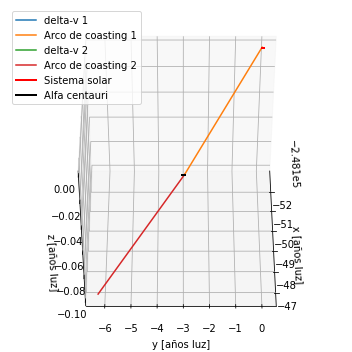

In [ ]:
Xas=[]
V0=[1500,90,270]
#V0=v2rec
cambio_plano(V0)

fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,0)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/100 años con sistemas.png")#,bbox_inches='tight')

In [ ]:
#V0=[13041.78754681,   134.26230354,   270.95118532]
V0=[130,90,90]
sol=minimize(cambio_plano,V0,args=(3,))
sol

[130.  90.  90.] [-2.34764657e+18 -5.55429757e+13 -9.72694975e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.329755905617851e+29
[130.  90.  90.] [-2.34764657e+18 -5.55429757e+13 -9.72694975e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.329755905617851e+29
[130.00000001  90.          90.        ] [-2.34764657e+18 -5.55429757e+13 -9.72694975e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.329755905617851e+29
[130.          90.00000001  90.        ] [-2.34764657e+18 -5.55429757e+13 -9.72694975e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.329755905617856e+29
[130.          90.          90.00000001] [-2.34764657e+18 -5.55429757e+13 -9.72694975e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.329755905617851e+29
[130.    88.99  90.  ] [-2.34764656e+18 -5.55479954e+13 -9.72694980e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 1.3297555295444076e+29
[130.    88.99  90.  ] [-2.34764656e+18 -5.55479954e+13 -9.72694980e+11] [-2.34767632e+

      fun: 1.3289829091394038e+29
 hess_inv: array([[-1.91312525e-19,  1.89397414e-21,  9.98579905e-18],
       [ 1.89397414e-21,  2.32636967e-22, -2.13819890e-20],
       [-1.93720686e-19, -2.13819890e-20, -1.26994334e-19]])
      jac: array([-3.54177486e+21,  2.00700576e+22,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 97
      nit: 7
     njev: 17
   status: 2
  success: False
        x: array([ 1.20291385e+04,  4.57297093e+00, -5.97358929e+03])

[13041.81798468, 134.26220812, 270.96266918] [-2.34767632e+18 -2.79204138e+13 -4.89293546e+11] [-2.34767632e+18 -2.79203997e+13 -4.89292893e+11] 9757856.092798566


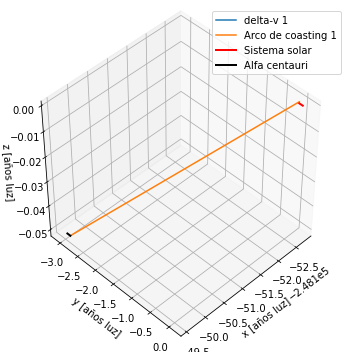

In [ ]:
Xas=[]
cambio_plano([13041.81798468,   134.26220812,   270.96266918])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[0,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[-1,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/100 años con sistemas.png")#,bbox_inches='tight')


Error con los planetas: [13041.81798468,   134.26220812,   270.96266918] 9757856.092798566

## con delta-v fijo(falcon heavy)

In [ ]:
deltav = 12.397 #maximum falcon heavy deltav
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
def cambio_plano(V,Nc=100):
    global Xas,rs1,rs2,deltav
    #Variables de control
    dv1=deltav
    tT1=V[0]*86400*365.25
    tieng=V[1]
    treng=V[2]    
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]

    

    sim=rb.Simulation("initial.bin")
    p1=sim.particles[1]
    p2=sim.particles[2]
    Nt=1000
    ts=np.linspace(0,tT1,Nt)
    for i,t in enumerate(ts):
        sim.integrate(t)
        p1=sim.particles[1]
        p2=sim.particles[2]
        rs1[i,:]=p1.x,p1.y,p1.z,p1.a,p1.e,p1.vx,p1.vy,p1.vz
        rs2[i,:]=p2.x,p2.y,p2.z,p2.a,p2.e,p2.vx,p2.vy,p2.vz
    

    #Función de costo
    f=(spy.vnorm(rf-rs2[-1,:3]))**2/REarth**2
    #f=rf-rt
    print(V,rf,rs2[-1,:3],f)
    
    return f

In [ ]:
spy.vnorm(rs2[-1,:3]-Xas[-1][-1,:3])**2/rsun**2

7.682602689410487e-12

[100000, 137.07196369, -89.03429849] [-2.34767901e+18  7.76073308e+14 -4.49074007e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081409561784e+17


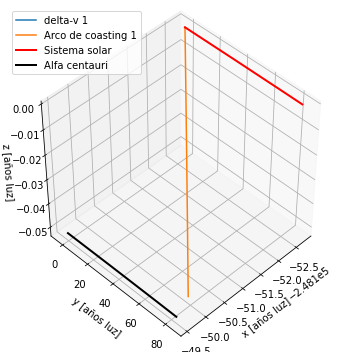

In [ ]:
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
V0=[100000,137.07196369,-89.03429849]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/heavy inicial.png")#,bbox_inches='tight')

In [ ]:
V0=[ 100000,137.07196369,-89.03429849]
sol=minimize(cambio_plano,V0,args=(3,))
sol

[ 1.00000000e+05  1.37071964e+02 -8.90342985e+01] [-2.34767901e+18  7.76073308e+14 -4.49074007e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081409561784e+17
[ 1.00000000e+05  1.37071964e+02 -8.90342985e+01] [-2.34767901e+18  7.76073308e+14 -4.49074007e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081409561784e+17
[ 1.00000000e+05  1.37071964e+02 -8.90342985e+01] [-2.34767901e+18  7.76073308e+14 -4.49074007e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081409559308e+17
[ 1.00000000e+05  1.37071964e+02 -8.90342985e+01] [-2.34767901e+18  7.76073308e+14 -4.49074006e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081406486917e+17
[ 1.00000000e+05  1.37071964e+02 -8.90342985e+01] [-2.34767901e+18  7.76073308e+14 -4.49074013e+11] [-2.34767619e+18  7.72045609e+14 -4.99084967e+11] 5.942081410101044e+17
[ 1.00000001e+05  1.38066780e+02 -8.92087662e+01] [-2.34767951e+18  7.75615020e+14 -3.61024783e+11] [-2.34767619e+18  7.72045615e+14 -4.9908

      fun: 5.844305452789276e+17
 hess_inv: array([[1.00334868, 0.04711047, 0.17319492],
       [0.04711047, 0.00221199, 0.00813206],
       [0.17319492, 0.00813206, 0.02989637]])
      jac: array([-3.04736520e+14,  5.00946947e+15, -1.68751842e+15])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 302
      nit: 2
     njev: 58
   status: 2
  success: False
        x: array([ 1.00000002e+05,  1.38104356e+02, -8.90704996e+01])

[113396.979, 138.414938, -89.0266218] [-2.34767617e+18  8.79344454e+14 -5.00210017e+11] [-2.34767615e+18  8.79324200e+14 -5.00397498e+11] 18108136900621.22


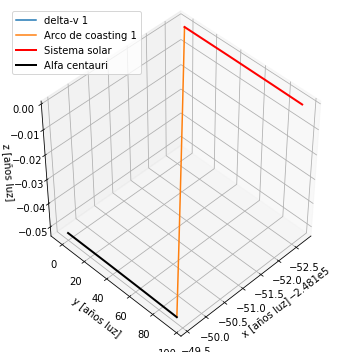

In [ ]:
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
Xas=[]
V0=[ 1.13396979e+05,  1.38414938e+02, -8.90266218e+01]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/heavy.png")#,bbox_inches='tight')

## con delta-v fijo(VASIMR)

In [ ]:
deltav = 50 #maximum falcon heavy deltav
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
def cambio_plano(V,Nc=100):
    global Xas,rs1,rs2,deltav
    #Variables de control
    dv1=deltav
    tT1=V[0]*86400*365.25
    tieng=V[1]
    treng=V[2]    
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]

    

    sim=rb.Simulation("initial.bin")
    p1=sim.particles[1]
    p2=sim.particles[2]
    Nt=1000
    ts=np.linspace(0,tT1,Nt)
    for i,t in enumerate(ts):
        sim.integrate(t)
        p1=sim.particles[1]
        p2=sim.particles[2]
        rs1[i,:]=p1.x,p1.y,p1.z,p1.a,p1.e,p1.vx,p1.vy,p1.vz
        rs2[i,:]=p2.x,p2.y,p2.z,p2.a,p2.e,p2.vx,p2.vy,p2.vz
    

    #Función de costo
    f=(spy.vnorm(rf-rs2[-1,:3]))**2/REarth**2
    #f=rf-rt
    print(V,rf,rs2[-1,:3],f)
    
    return f

[2200, 90, 340] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.025479253418934e+19


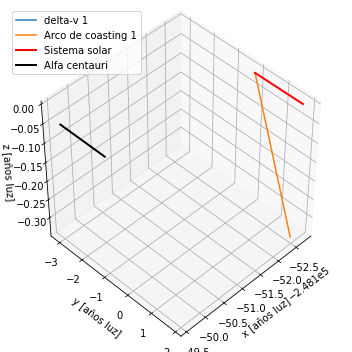

In [ ]:
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
V0=[ 2200,  90, 340]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/VASIMR inicial.png")#,bbox_inches='tight')

In [ ]:
V0=[ 2200,  90, 340]
sol=minimize(cambio_plano,V0,args=(3,))
sol

[2200.   90.  340.] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.025479253418934e+19
[2200.   90.  340.] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.025479253418934e+19
[2200.00000001   90.          340.        ] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.025479253419318e+19
[2200.           90.00000001  340.        ] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.025479253291064e+19
[2200.           90.          340.00000001] [-2.34770460e+18  1.77038136e+13 -3.26198882e+12] [-2.34767632e+18 -1.11043026e+13 -4.89498823e+11] 4.02547925349434e+19
[2199.99739156   90.86999192  339.48696271] [-2.34770457e+18  1.76510852e+13 -3.25084853e+12] [-2.34767632e+18 -1.11043234e+13 -4.89498823e+11] 4.013836075265504e+19
[2199.99739156   90.86999192  339.48696271] [-2.34770

      fun: 1.5927686628922573
 hess_inv: array([[ 1.24852463e-11,  1.35274435e-15,  1.74393979e-16],
       [ 1.35274435e-15,  3.97042893e-17, -7.14210603e-18],
       [ 1.74393979e-16, -7.14210603e-18,  6.16918414e-17]])
      jac: array([  -22504.94362979, 17450550.66775009, 17053172.20782579])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([26549.0470014 ,   224.71129862,   810.95631053])

In [ ]:
900-810.95631054

89.04368946

[26549.04700707, 224.71129862, 810.95631054] [-2.34767631e+18  1.83874733e+14 -4.91886239e+11] [-2.34767631e+18  1.83874733e+14 -4.91886237e+11] 0.38561490305486046


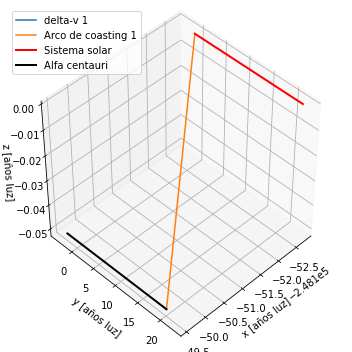

In [ ]:
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
Xas=[]
cambio_plano([26549.04700707,   224.71129862,   810.95631054])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/VASIMR.png")#,bbox_inches='tight')

## con delta-v fijo(parker solar probe)

In [ ]:
deltav = 200 #maximum parker solar probe velocity
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
def cambio_plano(V,Nc=100):
    global Xas,rs1,rs2,deltav
    #Variables de control
    dv1=deltav
    tT1=V[0]*86400*365.25
    tieng=V[1]
    treng=V[2]    
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=100), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]

    

    sim=rb.Simulation("initial.bin")
    p1=sim.particles[1]
    p2=sim.particles[2]
    Nt=1000
    ts=np.linspace(0,tT1,Nt)
    for i,t in enumerate(ts):
        sim.integrate(t)
        p1=sim.particles[1]
        p2=sim.particles[2]
        rs1[i,:]=p1.x,p1.y,p1.z,p1.a,p1.e,p1.vx,p1.vy,p1.vz
        rs2[i,:]=p2.x,p2.y,p2.z,p2.a,p2.e,p2.vx,p2.vy,p2.vz
    

    #Función de costo
    f=(spy.vnorm(rf-rs2[-1,:3]))**2/REarth**2
    #f=rf-rt
    print(V,rf,rs2[-1,:3],f)
    
    return f

[2000, 90, 250] [-2.34769393e+18  1.60943760e+13  4.31733395e+12] [-2.34767632e+18 -1.27058356e+13 -4.89479211e+11] 2.858032659350659e+19


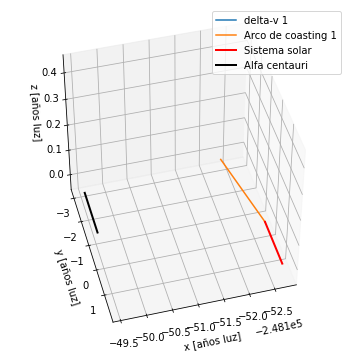

In [ ]:
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
V0=[2000, 90,250]
cambio_plano(V0)
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,75)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/solar probe inicial.png")#,bbox_inches='tight')

In [ ]:
V0=[1631.84592224, -582.59818784, -455.19568303]
sol=minimize(cambio_plano,V0,args=(3,))
sol

[1631.84592224 -582.59818784 -455.19568303] [-2.34769885e+18  5.55017135e+12  6.31294361e+11] [-2.34767632e+18 -1.56538903e+13 -4.89443109e+11] 2.355932041221964e+19
[1631.84592224 -582.59818784 -455.19568303] [-2.34769885e+18  5.55017135e+12  6.31294361e+11] [-2.34767632e+18 -1.56538903e+13 -4.89443109e+11] 2.355932041221964e+19
[1631.84592225 -582.59818784 -455.19568303] [-2.34769885e+18  5.55017135e+12  6.31294361e+11] [-2.34767632e+18 -1.56538903e+13 -4.89443109e+11] 2.3559320412148396e+19
[1631.84592224 -582.59818783 -455.19568303] [-2.34769885e+18  5.55017135e+12  6.31294361e+11] [-2.34767632e+18 -1.56538903e+13 -4.89443109e+11] 2.3559320412588044e+19
[1631.84592224 -582.59818784 -455.19568302] [-2.34769885e+18  5.55017135e+12  6.31294359e+11] [-2.34767632e+18 -1.56538903e+13 -4.89443109e+11] 2.3559320412120146e+19
[1632.03128832 -583.55669055 -454.93681632] [-2.34769872e+18  5.66849194e+12  6.10820830e+11] [-2.34767632e+18 -1.56524059e+13 -4.89443127e+11] 2.353790525789626e+19
[

      fun: 0.5134645699815745
 hess_inv: array([[ 1.31039771e-12, -5.22610294e-17,  5.61334953e-16],
       [-5.22610297e-17,  3.28491138e-17, -1.87150043e-18],
       [ 5.61334954e-16, -1.87150043e-18,  7.15853288e-17]])
      jac: array([ -741073.98979949, 56485256.38947384, 40849813.45857123])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 521
      nit: 23
     njev: 102
   status: 2
  success: False
        x: array([6549.07306148, -585.48407239, -449.04756508])

In [ ]:
360-224.71129862

135.28870138

[6549.07306148, 134.51592760999995, -89.04756508000003] [-2.34767632e+18  2.37216196e+13 -4.89925286e+11] [-2.34767632e+18  2.37216196e+13 -4.89925288e+11] 1.2357521717840207


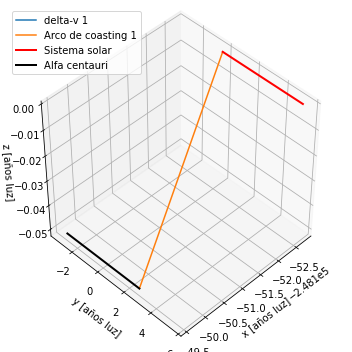

In [ ]:
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
Xas=[]
cambio_plano([6549.07306148, 134.51592760999995, -89.04756508000003])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[0,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[-1,2]/ly,c="k",linewidth=2,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
fig.tight_layout()
#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/solar probe.png")#,bbox_inches='tight')

## con delta-v fijo y con orbita de parqueo(parker solar probe)

In [ ]:
deltav = 200 #maximum parker solar probe velocity
Xas=[]
rs1=np.zeros((Nt,8))
rs2=np.zeros((Nt,8))
def cambio_plano(V,Nc=100):
    global Xas,rs1,rs2,deltav
    #Variables de control
    VV1=[6549.07306148, -585.48407239, -449.04756508] #resultado anterior
    
    dv1=deltav
    tT1=VV1[0]*86400*365.25
    tieng=VV1[1]
    treng=VV1[2] 
    dv2=V0[0]
    tT2=6000*86400*365.25
    tieng2=V0[1]
    treng2=V0[2]   
    #Propagación
    unidades=['km','kg','s']
    inicial=dict(x=vsun[0],y=vsun[1],z=vsun[2],vx=0,vy=Vsun)

    arcos=[
    #dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=1,unit="P",N=100),
    dict(deltav=dv1,ieng=tieng*deg,reng=treng*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=520), 
    dict(deltav=dv2,ieng=tieng2*deg,reng=treng2*deg,deltat=1,unit="ut",N=2),
    dict(deltav=0,ieng=0*deg,reng=0*deg,deltat=tT1,unit="ut",N=476), 
    ]
    tus,Xas,Eas=maniobras(unidades,inicial,arcos)
        
  
    sim=rb.Simulation("initial.bin")
    p1=sim.particles[1]
    p2=sim.particles[2]
    Nt=1000
    ts=np.linspace(0,tT1+tT2,Nt)
    for i,t in enumerate(ts):
        sim.integrate(t)
        p1=sim.particles[1]
        p2=sim.particles[2]
        rs1[i,:]=p1.x,p1.y,p1.z,p1.a,p1.e,p1.vx,p1.vy,p1.vz,p1.inc
        rs2[i,:]=p2.x,p2.y,p2.z,p2.a,p2.e,p2.vx,p2.vy,p2.vz,p2.inc
    
    #Extraer información
    af=Eas[-1][-1,0]
    ef=Eas[-1][-1,1]
    If=Eas[-1][-1,2]
    rf=Xas[-1][-1,:3]
    #Target
    rt=rs2[-1,:3]
    at=rs2[-1,3]
    et=rs2[-1,4]
    It=rs2[-1,8]
    
    #Función de costo
    #f=(spy.vnorm(rf-rt))**2/REarth**2
    f=(ef-et)**2 + (af-at)**2/REarth**2#+(If-It)**2/np.pi**2

    print(V,If,af-at,ef,f)
    
    return f

[185.01204, 102.010043, 90.746965] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2


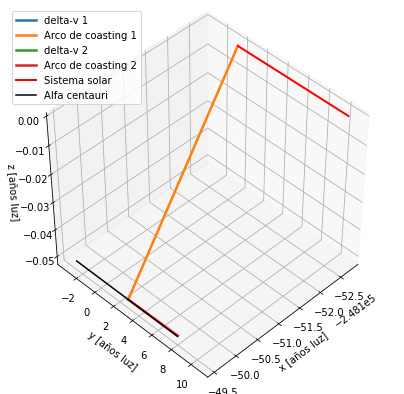

In [ ]:
Xas=[]
rs1=np.zeros((Nt,9))
rs2=np.zeros((Nt,9))
V0=[185.01204, 102.010043,90.746965]
cambio_plano(V0)

fig=plt.figure(figsize=(7,7))
ax=plt.subplot(111,projection="3d")
for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,linewidth=2.5,label=nombres[i])
#ax.set_aspect("equal")
ax.plot(rs1[:,0]/ly,rs1[:,1]/ly,rs1[:,2]/ly,c="r",linewidth=2,label="Sistema solar")
ax.plot(rs2[:,0]/ly,rs2[:,1]/ly,rs2[:,2]/ly,c="k",linewidth=1.5,label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)


#plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/solar probe con parqueo.png")#,bbox_inches='tight')

In [ ]:
len(Xas[3])

100

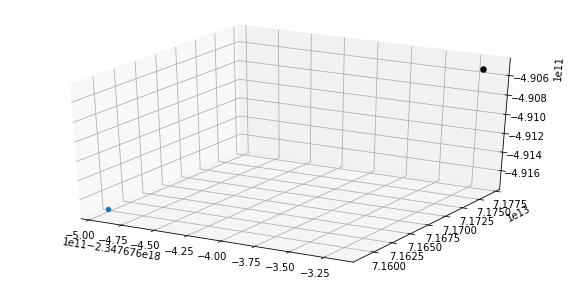

In [ ]:
i=3
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(111,projection="3d")
ax1.scatter(Xas[i][-1,0],Xas[i][-1,1],Xas[i][-1,2],label=nombres[i])
ax1.scatter(rs2[-1,0],rs2[-1,1],rs2[-1,2],c="k",linewidth=2,label="Alfa centauri")

In [ ]:
V0=[185.01204, 102.010043,90.746965]
sol=minimize(cambio_plano,V0,args=(1,))#,tol=1e-123)
sol

[185.01204  102.010043  90.746965] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2
[185.01204  102.010043  90.746965] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2
[185.01204001 102.010043    90.746965  ] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2
[185.01204    102.01004301  90.746965  ] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2
[185.01204    102.010043    90.74696501] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2


      fun: 1571203545548856.2
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([185.01204 , 102.010043,  90.746965])

[185.01204, 102.010043, 90.746965] 3.1415552125934223 -3.270683663381366e+17 0.17516900682903813 1571203545548856.2


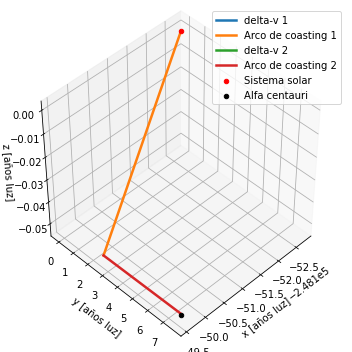

In [ ]:
rs1=np.zeros((Nt,9))
rs2=np.zeros((Nt,9))
Xas=[]
cambio_plano([185.01204, 102.010043,90.746965])
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111,projection="3d")

for i in range(len(Xas)):
    ax.plot(Xas[i][:,0]/ly,Xas[i][:,1]/ly,Xas[i][:,2]/ly,linewidth=2.5,label=nombres[i])
#ax.set_aspect("equal")
ax.scatter(rs1[0,0]/ly,rs1[0,1]/ly,rs1[0,2]/ly,c="r",label="Sistema solar")
ax.scatter(rs2[-1,0]/ly,rs2[-1,1]/ly,rs2[-1,2]/ly,c="k",label="Alfa centauri")
#rang=max([Xas[i].max() for i in range(len(arcos))])
#ax.set_xlim((-rang/REarth,rang/REarth))
#ax.set_ylim((-rang/REarth,rang/REarth))
#ax.set_zlim((-rang/REarth,rang/REarth))
ax.set_xlabel("x [años luz]")
ax.set_ylabel("y [años luz]")
ax.set_zlabel("z [años luz]")
ax.legend()
ax.view_init(45,45)
ax.view_init(45,45)
fig.tight_layout()
plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/solar probe con parqueo1.png")#,bbox_inches='tight')

##Animacion

In [ ]:
import imageio
from tqdm import tqdm 
plt.ioff()
imgs=[]
for j in tqdm(range(1,1000)):
    fig=plt.figure(figsize=(7,7))
    ax=plt.subplot(111,projection="3d")
    if j==1:
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.scatter(Xas[0][j,0]/ly,Xas[0][j,1]/ly,Xas[0][j,2]/ly,linewidth=2.5,c="saddlebrown",label="Nave espacial")
    elif 1<j<522:
        i=j-2
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        if i>0:
            ax.plot(Xas[1][:i,0]/ly,Xas[1][:i,1]/ly,Xas[1][:i,2]/ly,linewidth=2.5,label=nombres[1])
        ax.scatter(Xas[1][i,0]/ly,Xas[1][i,1]/ly,Xas[1][i,2]/ly,linewidth=2.5,c="saddlebrown",label="Nave espacial")
    elif 521<j<524:
        i=j-522
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.plot(Xas[1][:,0]/ly,Xas[1][:,1]/ly,Xas[1][:,2]/ly,linewidth=2.5,label=nombres[1])
        ax.plot(Xas[2][:,0]/ly,Xas[2][:,1]/ly,Xas[2][:,2]/ly,linewidth=2.5,label=nombres[2])
        ax.scatter(Xas[2][i,0]/ly,Xas[2][i,1]/ly,Xas[2][i,2]/ly,linewidth=2.5,c="saddlebrown",label="Nave espacial")
    elif 523<j<1000:
        i=j-524
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.plot(Xas[1][:,0]/ly,Xas[1][:,1]/ly,Xas[1][:,2]/ly,linewidth=2.5,label=nombres[1])
        ax.plot(Xas[2][:,0]/ly,Xas[2][:,1]/ly,Xas[2][:,2]/ly,linewidth=2.5,label=nombres[2])
        if i>0:
            ax.plot(Xas[3][:i,0]/ly,Xas[3][:i,1]/ly,Xas[3][:i,2]/ly,linewidth=2.5,label=nombres[3])
        ax.scatter(Xas[3][i,0]/ly,Xas[3][i,1]/ly,Xas[3][i,2]/ly,linewidth=2.5,c="saddlebrown",label="Nave espacial")
    xr2 = "Año = "+str(12549*(j-1)/1000)
    ax.text(rs1[0,0]/ly+2,rs1[0,1]/ly-1,rs1[0,2]/ly,xr2)  
    #ax.set_aspect("equal")
    ax.plot(rs1[:j,0]/ly,rs1[:j,1]/ly,rs1[:j,2]/ly,c="r",linewidth=2)
    ax.plot(rs2[:j,0]/ly,rs2[:j,1]/ly,rs2[:j,2]/ly,c="k",linewidth=1.5)
    ax.scatter(rs1[j,0]/ly,rs1[j,1]/ly,rs1[j,2]/ly,c="r",linewidth=2,label="Sistema solar")
    ax.scatter(rs2[j,0]/ly,rs2[j,1]/ly,rs2[j,2]/ly,c="k",linewidth=1.5,label="Alfa centauri")
    #rang=max([Xas[i].max() for i in range(len(arcos))])
    #ax.set_xlim((-rang/REarth,rang/REarth))
    #ax.set_ylim((-rang/REarth,rang/REarth))
    #ax.set_zlim((-rang/REarth,rang/REarth))
    ax.set_xlabel("x [años luz]")
    ax.set_ylabel("y [años luz]")
    ax.set_zlabel("z [años luz]")
    ax.legend()
    ax.view_init(45,45)
    plt.savefig("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/Animación/"+str(j)+".png")
    imgs.append(imageio.imread("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/Animación/"+str(j)+".png"))
imageio.mimsave("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/anime.gif", imgs, duration=0.001, subrectangles=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imageio.mimsave("/content/drive/Shareddrives/Astrodinámica Aplicada/Imagenes alfa centauri/anime.gif", imgs, duration=0.001, subrectangles=True)


100%|██████████| 2/2 [00:00<00:00, 26.20it/s]


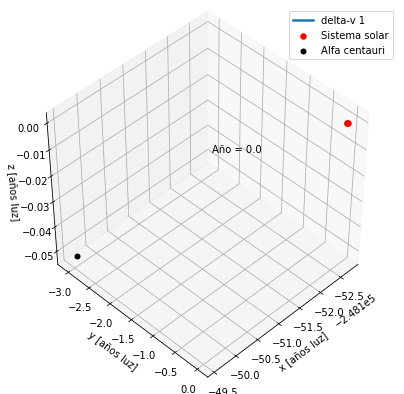

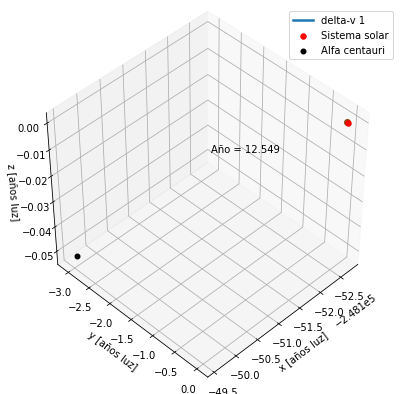

In [ ]:

for j in tqdm(range(1,3)):
    fig=plt.figure(figsize=(7,7))
    ax=plt.subplot(111,projection="3d")
    if j==1:
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.scatter(Xas[0][j,0]/ly,Xas[0][j,1]/ly,Xas[0][j,2]/ly,linewidth=2.5,c="saddlebrown")
    elif 1<j<522:
        i=j-2
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        if i>0:
            ax.plot(Xas[1][:i,0]/ly,Xas[1][:i,1]/ly,Xas[1][:i,2]/ly,linewidth=2.5,label=nombres[1])
        ax.scatter(Xas[1][i,0]/ly,Xas[1][i,1]/ly,Xas[1][i,2]/ly,linewidth=2.5,c="saddlebrown")
    elif 521<j<524:
        i=j-522
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.plot(Xas[1][:,0]/ly,Xas[1][:,1]/ly,Xas[1][:,2]/ly,linewidth=2.5,label=nombres[1])
        ax.plot(Xas[2][:,0]/ly,Xas[2][:,1]/ly,Xas[2][:,2]/ly,linewidth=2.5,label=nombres[2])
        ax.scatter(Xas[2][i,0]/ly,Xas[2][i,1]/ly,Xas[2][i,2]/ly,linewidth=2.5,c="saddlebrown")
    elif 523<j<1000:
        i=j-524
        ax.plot(Xas[0][:,0]/ly,Xas[0][:,1]/ly,Xas[0][:,2]/ly,linewidth=2.5,label=nombres[0])
        ax.plot(Xas[1][:,0]/ly,Xas[1][:,1]/ly,Xas[1][:,2]/ly,linewidth=2.5,label=nombres[1])
        ax.plot(Xas[2][:,0]/ly,Xas[2][:,1]/ly,Xas[2][:,2]/ly,linewidth=2.5,label=nombres[2])
        if i>0:
            ax.plot(Xas[3][:i,0]/ly,Xas[3][:i,1]/ly,Xas[3][:i,2]/ly,linewidth=2.5,label=nombres[3])
        ax.scatter(Xas[3][i,0]/ly,Xas[3][i,1]/ly,Xas[3][i,2]/ly,linewidth=2.5,c="saddlebrown")
    xr2 = "Año = "+str(12549*(j-1)/1000)
    ax.text(rs1[0,0]/ly+2,rs1[0,1]/ly-1,rs1[0,2]/ly,xr2)  
    #ax.set_aspect("equal")
    ax.plot(rs1[:j,0]/ly,rs1[:j,1]/ly,rs1[:j,2]/ly,c="r",linewidth=2)
    ax.plot(rs2[:j,0]/ly,rs2[:j,1]/ly,rs2[:j,2]/ly,c="k",linewidth=1.5)
    ax.scatter(rs1[j,0]/ly,rs1[j,1]/ly,rs1[j,2]/ly,c="r",linewidth=2,label="Sistema solar")
    ax.scatter(rs2[j,0]/ly,rs2[j,1]/ly,rs2[j,2]/ly,c="k",linewidth=1.5,label="Alfa centauri")
    #rang=max([Xas[i].max() for i in range(len(arcos))])
    #ax.set_xlim((-rang/REarth,rang/REarth))
    #ax.set_ylim((-rang/REarth,rang/REarth))
    #ax.set_zlim((-rang/REarth,rang/REarth))
    ax.set_xlabel("x [años luz]")
    ax.set_ylabel("y [años luz]")
    ax.set_zlabel("z [años luz]")
    ax.legend()
    ax.view_init(45,45)